In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import geoplot
from shapely.geometry import Polygon

We load in the prepared data set

In [4]:
file_path = "./data/"

bikesharing = pd.read_csv(f"{file_path}chicago_2017_prepared.csv", infer_datetime_format=True)

In [5]:
bikesharing

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,start_hour,start_day,start_month,start_weekday,max_temp,min_temp,precip,start_lat,start_long,end_lat,end_long
0,2017-01-01 00:00:36,2017-01-01 00:06:32,414,191,Canal St & Taylor St,Canal St & Monroe St (*),2511,Customer,0,1,1,6,-0.6,-0.6,0.0,41.870257,-87.639474,41.880884,-87.639525
1,2017-01-01 00:02:54,2017-01-01 00:08:21,28,20,Larrabee St & Menomonee St,Sheffield Ave & Kingsbury St,3660,Subscriber,0,1,1,6,-0.6,-0.6,0.0,41.914680,-87.643320,41.910522,-87.653106
2,2017-01-01 00:06:06,2017-01-01 00:18:31,620,333,Orleans St & Chestnut St (NEXT Apts),Ashland Ave & Blackhawk St,4992,Subscriber,0,1,1,6,-0.6,-0.6,0.0,41.898203,-87.637536,41.907066,-87.667252
3,2017-01-01 00:07:28,2017-01-01 00:12:51,287,68,Franklin St & Monroe St,Clinton St & Tilden St,5637,Subscriber,0,1,1,6,-0.6,-0.6,0.0,41.880317,-87.635185,41.875885,-87.640795
4,2017-01-01 00:07:57,2017-01-01 00:20:53,300,118,Broadway & Barry Ave,Sedgwick St & North Ave,2209,Subscriber,0,1,1,6,-0.6,-0.6,0.0,41.937725,-87.644095,41.911386,-87.638677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3828949,2017-12-31 23:21:00,2017-12-31 23:23:00,226,117,Racine Ave & Belmont Ave,Wilton Ave & Belmont Ave,2562,Subscriber,23,31,12,6,-12.8,-12.8,0.0,41.939743,-87.658865,41.940180,-87.653040
3828950,2017-12-31 23:34:00,2017-12-31 23:39:00,337,182,Clark St & Chicago Ave,Wells St & Elm St,6351,Subscriber,23,31,12,6,-12.8,-12.8,0.0,41.896544,-87.630931,41.903222,-87.634324
3828951,2017-12-31 23:41:00,2017-12-31 23:51:00,93,343,Sheffield Ave & Willow St,Racine Ave & Wrightwood Ave,5840,Subscriber,23,31,12,6,-12.8,-12.8,0.0,41.913688,-87.652855,41.928887,-87.658971
3828952,2017-12-31 23:42:00,2017-12-31 23:47:00,240,245,Sheridan Rd & Irving Park Rd,Clarendon Ave & Junior Ter,5353,Subscriber,23,31,12,6,-12.8,-12.8,0.0,41.954245,-87.654406,41.961004,-87.649603


In [7]:
chicago_geojson = gpd.read_file(f"{file_path}Chicago.geojson")

In [9]:
chicago_geojson

,pri_neigh,sec_neigh,shape_area,shape_len,geometry
0,Grand Boulevard,BRONZEVILLE,48492503.1554,28196.837157,"MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ..."
1,Printers Row,PRINTERS ROW,2162137.97139,6864.247156,"MULTIPOLYGON (((-87.62761 41.87437, -87.62760 ..."
2,United Center,UNITED CENTER,32520512.7053,23101.363745,"MULTIPOLYGON (((-87.66707 41.88885, -87.66707 ..."
3,Sheffield & DePaul,SHEFFIELD & DEPAUL,10482592.2987,13227.049745,"MULTIPOLYGON (((-87.65833 41.92166, -87.65835 ..."
4,Humboldt Park,HUMBOLDT PARK,125010425.593,46126.751351,"MULTIPOLYGON (((-87.74060 41.88782, -87.74060 ..."
...,...,...,...,...,...
93,Belmont Cragin,"BELMONT CRAGIN,HERMOSA",109099407.211,43311.706886,"MULTIPOLYGON (((-87.74143 41.91698, -87.74141 ..."
94,Austin,AUSTIN,170037750.826,55473.345911,"MULTIPOLYGON (((-87.75620 41.91547, -87.75588 ..."
95,Gold Coast,GOLD COAST,7165705.53467,13685.479377,"MULTIPOLYGON (((-87.62646 41.91147, -87.62640 ..."
96,Boystown,BOYSTOWN,3365778.97115,9780.268985,"MULTIPOLYGON (((-87.64878 41.93999, -87.64927 ..."


<GeoAxesSubplot: >

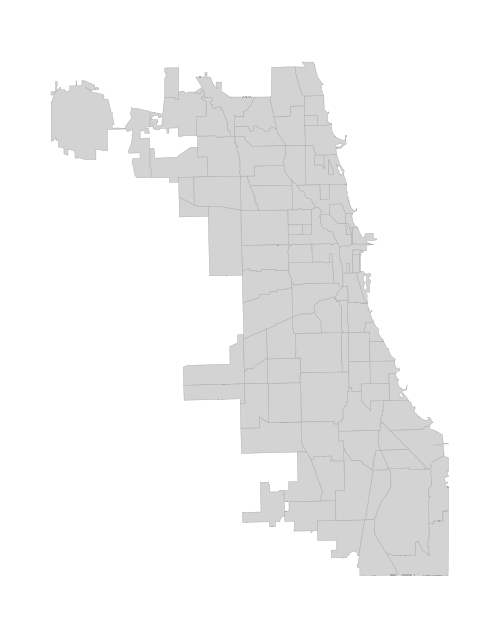

In [11]:
geoplot.polyplot(chicago_geojson, projection=geoplot.crs.AlbersEqualArea(), edgecolor='darkgrey', facecolor='lightgrey', linewidth=.3,
    figsize=(12, 8))

In [14]:
gdf = gpd.GeoDataFrame(
    bikesharing, geometry=gpd.points_from_xy(bikesharing.start_long, bikesharing.start_lat))

In [15]:
gdf

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,start_hour,start_day,start_month,start_weekday,max_temp,min_temp,precip,start_lat,start_long,end_lat,end_long,geometry
0,2017-01-01 00:00:36,2017-01-01 00:06:32,414,191,Canal St & Taylor St,Canal St & Monroe St (*),2511,Customer,0,1,1,6,-0.6,-0.6,0.0,41.870257,-87.639474,41.880884,-87.639525,POINT (-87.63947 41.87026)
1,2017-01-01 00:02:54,2017-01-01 00:08:21,28,20,Larrabee St & Menomonee St,Sheffield Ave & Kingsbury St,3660,Subscriber,0,1,1,6,-0.6,-0.6,0.0,41.914680,-87.643320,41.910522,-87.653106,POINT (-87.64332 41.91468)
2,2017-01-01 00:06:06,2017-01-01 00:18:31,620,333,Orleans St & Chestnut St (NEXT Apts),Ashland Ave & Blackhawk St,4992,Subscriber,0,1,1,6,-0.6,-0.6,0.0,41.898203,-87.637536,41.907066,-87.667252,POINT (-87.63754 41.89820)
3,2017-01-01 00:07:28,2017-01-01 00:12:51,287,68,Franklin St & Monroe St,Clinton St & Tilden St,5637,Subscriber,0,1,1,6,-0.6,-0.6,0.0,41.880317,-87.635185,41.875885,-87.640795,POINT (-87.63518 41.88032)
4,2017-01-01 00:07:57,2017-01-01 00:20:53,300,118,Broadway & Barry Ave,Sedgwick St & North Ave,2209,Subscriber,0,1,1,6,-0.6,-0.6,0.0,41.937725,-87.644095,41.911386,-87.638677,POINT (-87.64409 41.93773)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3828949,2017-12-31 23:21:00,2017-12-31 23:23:00,226,117,Racine Ave & Belmont Ave,Wilton Ave & Belmont Ave,2562,Subscriber,23,31,12,6,-12.8,-12.8,0.0,41.939743,-87.658865,41.940180,-87.653040,POINT (-87.65887 41.93974)
3828950,2017-12-31 23:34:00,2017-12-31 23:39:00,337,182,Clark St & Chicago Ave,Wells St & Elm St,6351,Subscriber,23,31,12,6,-12.8,-12.8,0.0,41.896544,-87.630931,41.903222,-87.634324,POINT (-87.63093 41.89654)
3828951,2017-12-31 23:41:00,2017-12-31 23:51:00,93,343,Sheffield Ave & Willow St,Racine Ave & Wrightwood Ave,5840,Subscriber,23,31,12,6,-12.8,-12.8,0.0,41.913688,-87.652855,41.928887,-87.658971,POINT (-87.65286 41.91369)
3828952,2017-12-31 23:42:00,2017-12-31 23:47:00,240,245,Sheridan Rd & Irving Park Rd,Clarendon Ave & Junior Ter,5353,Subscriber,23,31,12,6,-12.8,-12.8,0.0,41.954245,-87.654406,41.961004,-87.649603,POINT (-87.65441 41.95425)


In [18]:
merged = gpd.sjoin(gdf, chicago_geojson, how='right', op='within')

C:\Users\Onno Peters\anaconda3\envs\aaenv\Lib\site-packages\IPython\core\interactiveshell.py:3373: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\Onno Peters\AppData\Local\Temp\ipykernel_12260\3555648543.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  merged = gpd.sjoin(gdf, chicago_geojson, how='right', op='within')


In [19]:
merged

,index_left,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,start_hour,...,precip,start_lat,start_long,end_lat,end_long,pri_neigh,sec_neigh,shape_area,shape_len,geometry
0,1003702.0,2017-05-29 12:54:21,2017-05-29 13:21:27,201.0,4.0,Indiana Ave & 40th St,Burnham Harbor,5663.0,Customer,12.0,...,0.0,41.821680,-87.621600,41.856268,-87.613348,Grand Boulevard,BRONZEVILLE,48492503.1554,28196.837157,"MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ..."
0,765856.0,2017-05-08 19:26:25,2017-05-08 19:28:48,201.0,179.0,Indiana Ave & 40th St,MLK Jr Dr & Oakwood Blvd,355.0,Subscriber,19.0,...,0.0,41.821680,-87.621600,41.822560,-87.616150,Grand Boulevard,BRONZEVILLE,48492503.1554,28196.837157,"MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ..."
0,1354599.0,2017-06-19 13:30:52,2017-06-19 14:23:01,201.0,97.0,Indiana Ave & 40th St,Field Museum,74.0,Customer,13.0,...,0.0,41.821680,-87.621600,41.865312,-87.617867,Grand Boulevard,BRONZEVILLE,48492503.1554,28196.837157,"MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ..."
0,2999162.0,2017-09-21 07:41:42,2017-09-21 08:03:57,201.0,59.0,Indiana Ave & 40th St,Wabash Ave & Roosevelt Rd,5109.0,Subscriber,7.0,...,0.0,41.821680,-87.621600,41.867227,-87.625961,Grand Boulevard,BRONZEVILLE,48492503.1554,28196.837157,"MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ..."
0,271520.0,2017-02-27 18:46:44,2017-02-27 18:50:04,201.0,179.0,Indiana Ave & 40th St,MLK Jr Dr & Oakwood Blvd,1431.0,Subscriber,18.0,...,0.0,41.821680,-87.621600,41.822560,-87.616150,Grand Boulevard,BRONZEVILLE,48492503.1554,28196.837157,"MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,1272764.0,2017-06-14 06:53:29,2017-06-14 06:55:54,23.0,620.0,Orleans St & Elm St (*),Orleans St & Chestnut St (NEXT Apts),5917.0,Subscriber,6.0,...,0.0,41.902924,-87.637715,41.898203,-87.637536,River North,RIVER NORTH,38766442.5194,31506.03781,"MULTIPOLYGON (((-87.63145 41.90390, -87.63144 ..."
97,113440.0,2017-02-01 08:47:47,2017-02-01 08:59:16,23.0,194.0,Orleans St & Elm St (*),Wabash Ave & Wacker Pl,417.0,Subscriber,8.0,...,0.0,41.902924,-87.637715,41.886875,-87.626030,River North,RIVER NORTH,38766442.5194,31506.03781,"MULTIPOLYGON (((-87.63145 41.90390, -87.63144 ..."
97,113333.0,2017-02-01 08:39:38,2017-02-01 08:54:02,23.0,40.0,Orleans St & Elm St (*),LaSalle St & Adams St,5452.0,Subscriber,8.0,...,0.0,41.902924,-87.637715,41.879344,-87.631985,River North,RIVER NORTH,38766442.5194,31506.03781,"MULTIPOLYGON (((-87.63145 41.90390, -87.63144 ..."
97,1474085.0,2017-06-26 09:15:05,2017-06-26 09:17:48,23.0,620.0,Orleans St & Elm St (*),Orleans St & Chestnut St (NEXT Apts),3821.0,Subscriber,9.0,...,0.0,41.902924,-87.637715,41.898203,-87.637536,River North,RIVER NORTH,38766442.5194,31506.03781,"MULTIPOLYGON (((-87.63145 41.90390, -87.63144 ..."


In [28]:
merged_count = merged[["index_left", "pri_neigh"]].groupby("pri_neigh").count().reset_index()
merged_count

,pri_neigh,index_left
0,Albany Park,5597
1,Andersonville,6742
2,Archer Heights,0
3,Armour Square,6269
4,Ashburn,0
...,...,...
93,West Ridge,5088
94,West Town,113372
95,Wicker Park,90691
96,Woodlawn,6815


In [34]:
data_count_merged = pd.merge(merged_count, chicago_geojson, on="pri_neigh", how='left')
data_count_merged_gpd = gpd.GeoDataFrame(data_count_merged, geometry="geometry")

geopandas.geodataframe.GeoDataFrame

<AxesSubplot: >

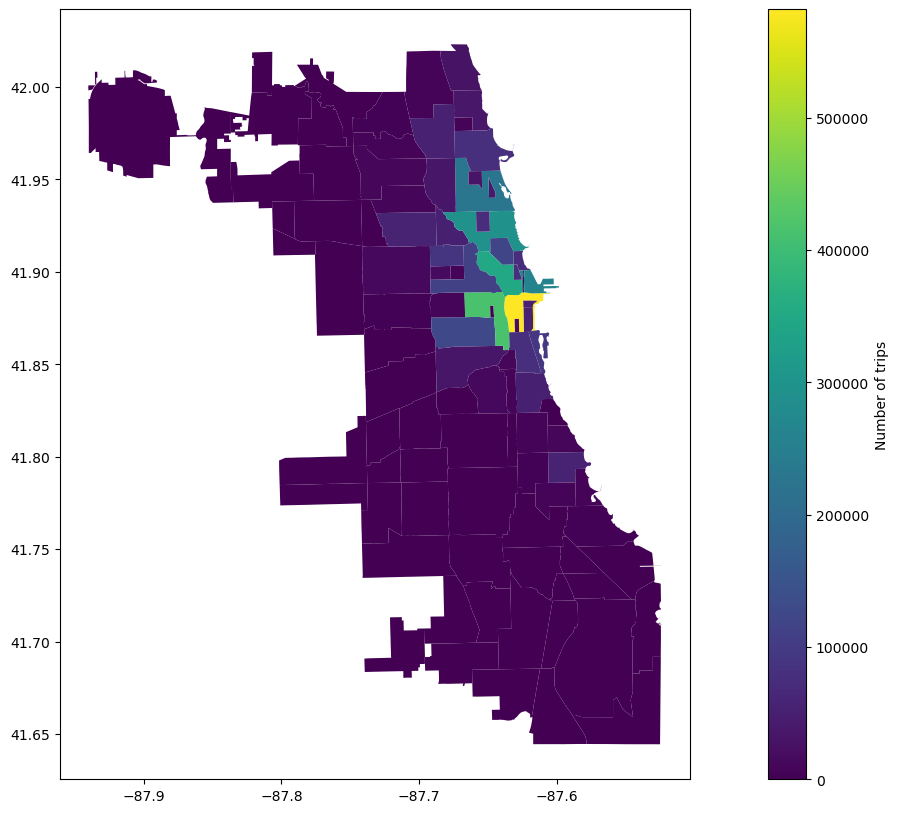

In [35]:
data_count_merged_gpd.plot( column = 'index_left',
                      legend = True, 
                      figsize = [20,10],\
                      legend_kwds = {'label': "Number of trips"})